In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

c:\users\musth\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\musth\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\musth\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\musth\appd

In [2]:
df = pd.read_excel('measurements2.xlsx')
ad = df[['distance', 'consume']]
td=df[['distance']]
td = td.values
ts = df[['consume']]

In [3]:
dr = pd.read_csv('data.csv')
dr = dr[['fuel_cost_12000_miles', 'co2']]
dr

c:\users\musth\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fuel_cost_12000_miles,co2
0,NaN,195
1,NaN,200
2,NaN,210
3,NaN,195
4,NaN,200
5,NaN,210
6,NaN,195
7,NaN,195
8,NaN,202
9,NaN,202


In [4]:
dr.describe()

,fuel_cost_12000_miles,co2
count,33136.000000,45511.000000
mean,1548.094490,189.592846
std,518.408529,56.993217
min,0.000000,0.000000
25%,1220.570000,150.000000
50%,1463.000000,180.000000
75%,1768.250000,218.000000
max,5538.000000,590.000000


In [5]:
dr = dr.dropna()
dr.isna().sum()

fuel_cost_12000_miles    0
co2                      0
dtype: int64

In [6]:
dr.describe()

,fuel_cost_12000_miles,co2
count,33136.000000,33136.000000
mean,1548.094490,181.785882
std,518.408529,55.107480
min,0.000000,0.000000
25%,1220.570000,144.000000
50%,1463.000000,171.000000
75%,1768.250000,207.000000
max,5538.000000,545.000000


In [7]:
def normfuel(x):
  return (x - 1548.094490) / 518.408529
def normgas(x):
  return (x - 181.785882) / 55.107480

In [8]:
train = dr[:30000] 
test = dr[30000:]
train

,fuel_cost_12000_miles,co2
12231,1269.0,194
12232,1250.0,192
12233,941.0,155
12234,957.0,157
12235,957.0,157
12236,1377.0,211
12237,1377.0,211
12238,1873.0,287
12239,1269.0,195
12240,1315.0,202


In [9]:
trainx = train[['fuel_cost_12000_miles']]
trainy = train[['co2']]
testx = test[['fuel_cost_12000_miles']]
testy = test[['co2']]

In [10]:
trainx = trainx.values
trainy = trainy.values
testx = testx.values
testy = testy.values

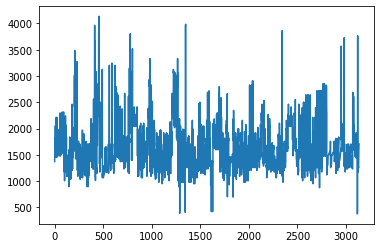

In [12]:
import matplotlib.pyplot as plt
plt.plot(testx)

In [13]:
normed_test_x = normfuel(testx)

In [14]:
normed_train_x = normfuel(trainx)
normed_train_y = normgas(trainy)
normed_test_x = normfuel(testx)
normed_test_y = normgas(testy)

In [15]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr, pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(normed_train_x, normed_train_y)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.695


In [16]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [23]:
modelgas = Sequential([
    Dense(128, activation='relu', input_shape=[1]),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')
])
    
modelgas.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['mae', 'mse', 'acc'])

In [28]:
modelgas2 = Sequential([
    Dense(128, input_shape=[1]),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(1)
])
    
modelgas2.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['mae', 'mse'])

In [29]:
modelgas.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 49,921
Trainable params: 49,921
Non-trainable params: 0
__________________________________________________

In [ ]:
history = modelgas.fit(normed_train_x, normed_train_y, epochs=100, validation_data=(normed_test_x, normed_test_y))

Train on 30000 samples, validate on 3136 samples
Epoch 1/100
30000/30000 [==============================] - 2s 59us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 2/100
30000/30000 [==============================] - 2s 59us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 3/100
30000/30000 [==============================] - 2s 60us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 4/100
30000/30000 [==============================] - 2s 60us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 5/100
30000/30000 [==============================] - 2s 60us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8

Epoch 40/100
30000/30000 [==============================] - 2s 79us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 41/100
30000/30000 [==============================] - 3s 86us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 42/100
30000/30000 [==============================] - 3s 85us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 43/100
30000/30000 [==============================] - 2s 80us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 - val_acc: 0.0000e+00
Epoch 44/100
30000/30000 [==============================] - 2s 79us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - acc: 0.0000e+00 - val_loss: 3.0382 - v

In [174]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,val_acc,loss,mae,mse,acc,epoch
95,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891442,0.0,95
96,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891441,0.0,96
97,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891441,0.0,97
98,3.038188,1.635926,3.038188,0.0,1.891441,1.203828,1.891442,0.0,98
99,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891441,0.0,99


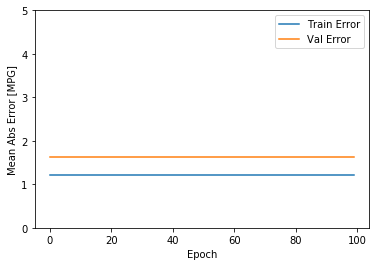

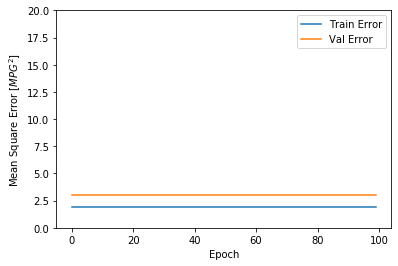

In [175]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history2)

In [176]:
rew = modelgas2.predict([1269])


[[1.]]


In [161]:
history2 = modelgas2.fit(normed_train_x, normed_train_y, epochs=1000, validation_data=(normed_test_x, normed_test_y))

Train on 30000 samples, validate on 3136 samples
Epoch 1/100
30000/30000 [==============================] - 2s 75us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382
Epoch 2/100
30000/30000 [==============================] - 2s 78us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382
Epoch 3/100
30000/30000 [==============================] - 2s 78us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382
Epoch 4/100
30000/30000 [==============================] - 2s 61us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382
Epoch 5/100
30000/30000 [==============================] - 1s 37us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382 loss: 1.9079 - mae: 1.212
Epoch 6/100
30000/30000 [==============================] - 1s 37us/step - l

Epoch 96/100
30000/30000 [==============================] - 1s 37us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382loss: 1.9074 - mae: 1.2116 - 
Epoch 97/100
30000/30000 [==============================] - 1s 37us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382
Epoch 98/100
30000/30000 [==============================] - ETA: 0s - loss: 1.8889 - mae: 1.2031 - mse: 1.888 - 1s 37us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382
Epoch 99/100
30000/30000 [==============================] - 1s 37us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382
Epoch 100/100
30000/30000 [==============================] - 1s 37us/step - loss: 1.8914 - mae: 1.2038 - mse: 1.8914 - val_loss: 3.0382 - val_mae: 1.6359 - val_mse: 3.0382


In [165]:
hist2 = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,val_acc,loss,mae,mse,acc,epoch
95,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891442,0.0,95
96,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891441,0.0,96
97,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891441,0.0,97
98,3.038188,1.635926,3.038188,0.0,1.891441,1.203828,1.891442,0.0,98
99,3.038188,1.635926,3.038188,0.0,1.891441,1.203827,1.891441,0.0,99


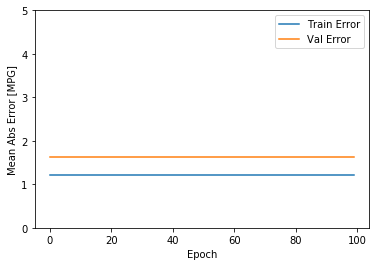

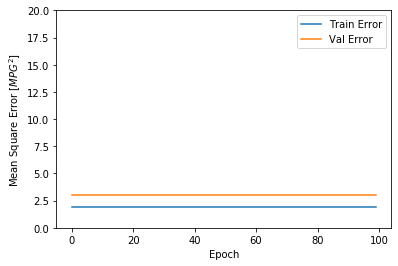

In [162]:


def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [7]:
data = df[['distance', 'speed', 'consume']]
data

,distance,speed,consume
0,28.0,26,5.0
1,12.0,30,4.2
2,11.2,38,5.5
3,12.9,36,3.9
4,18.5,46,4.5
5,8.3,50,6.4
6,7.8,43,4.4
7,12.3,40,5.0
8,4.9,26,6.4
9,11.9,30,5.3


In [19]:
data.isna().sum()

distance    0
speed       0
consume     0
dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
modelspeed = Sequential([
    Dense(128, activation='relu', input_shape=[1]),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])
    
modelgas.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['mae', 'mse', 'acc'])

In [ ]:
historyspeed = modelgas2.fit(normed_train_x, normed_train_y, epochs=1000, validation_data=(normed_test_x, normed_test_y))